# iSNV counting  

**Date**: written 2021-04-20    
**Author**: Katarina Braun 


## Overview
- Interrogate cleaned, intersection iSNV files (produced by the data_cleaning_and_intersection notebook) to count iSNVs
-  Total number of unique iSNVs 
- Total number of unique iSNVs within each virus group 
- Average number of unique iSNVs per ferret (across available timepoints) 
- Average number of iSNVs at each time point, divided by index and contact. 
- Average number of iSNVs in index ferrets (across all available time points) vs contact timepoint (across available timepoints) 
 

### a note about numbering schemes 

For H7N9, I used H7 numbering. This numbering scheme matches the numbering scheme on Nextstrain (https://nextstrain.org/).  
For H1N1pdm, I use H1 numbering. Again, this numbering scheme matches the numbering scheme on Nextstrain. For clarity, I start counting amino acids at nucleotide #51, AA #18 (D). 
 

## Input: 

- annotated VCF files that Sniffles outputs: `H7N9/data_derived/iSNVs/vcfs-intersection/*`

## Output: 

- iSNV counts (printed within this notebook) 
- iSNV count plots (over time): `H7N9/figures/iSNV-counts/*`
 


### import modules and dependencies

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import glob
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pathlib import Path
from os.path import splitext
from functools import reduce
from pandas.api.types import is_numeric_dtype
import warnings
from pandas.core.common import SettingWithCopyWarning
from matplotlib.font_manager import FontProperties 
from matplotlib import cm
import itertools
from matplotlib import container
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib as mpl
from pandas.plotting import table
import seaborn as sns
from scipy import stats


from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

## total iSNVs

In [4]:
# load all text files in a directory into Pandas dataframes 
def load_intersection_dataframes(path):
    filelist = [os.path.splitext(file)[0] for file in os.listdir(path) if file.endswith('_intersection.csv')]
    list_of_DFs = []
    for file in filelist:
        DF = path + '/' + file + '.csv'
        file = pd.read_csv(DF, header=0, sep='\t', low_memory=False)
        file = file[file['%'] <= 0.99]
        list_of_DFs.append(file)
#     print(filelist)
    return(list_of_DFs)

In [5]:
a = load_intersection_dataframes('../data_derived/vcfs-intersection')
all_intersection_dataframes = pd.concat(a, axis=0) # concat all dataframes 

all_intersection_dataframes
all_intersection_dataframes = all_intersection_dataframes.drop_duplicates(['SNP'], keep='first')
all_intersection_dataframes.to_csv('../data_derived/iSNV-counts/all-iSNVs.csv', sep='\t')

print('Number of unique iSNVs across all ferrets and timepoints ', len(all_intersection_dataframes))

all_iSNVs = len(all_intersection_dataframes)
syn = all_intersection_dataframes.SNP.str.count('_syn').sum()
stop = all_intersection_dataframes.SNP.str.count('\*').sum()

print('Number of syn iSNVs ', all_intersection_dataframes.SNP.str.count('_syn').sum())
print('Number of stop iSNVs ', all_intersection_dataframes.SNP.str.count('\*').sum())
print('Number of nonsyn iSNVs ', all_iSNVs - stop - syn)

Number of unique iSNVs across all ferrets and timepoints  867
Number of syn iSNVs  482
Number of stop iSNVs  3
Number of nonsyn iSNVs  382


## iSNVs by virus group

In [6]:
# load all text files in a directory into Pandas dataframes 
def load_intersection_dataframes(path):
    filelist = [os.path.splitext(file)[0] for file in os.listdir(path) if file.startswith('Anhui')]
    list_of_DFs = []
    for file in filelist:
        DF = path + '/' + file + '.csv'
        file = pd.read_csv(DF, header=0, sep='\t', low_memory=False)
        file = file[file['%'] <= 0.99]
        list_of_DFs.append(file)
#     print(filelist)
    return(list_of_DFs)

a = load_intersection_dataframes('../data_derived/vcfs-intersection')
all_intersection_dataframes = pd.concat(a, axis=0) # concat all dataframes 

all_intersection_dataframes
all_intersection_dataframes = all_intersection_dataframes.drop_duplicates(['SNP'], keep='first')

all_intersection_dataframes.to_csv('../data_derived/iSNV-counts/Anhui-iSNVs.csv', sep='\t')

print('Number of unique iSNVs across all ferrets and timepoints in the Anhui group ', len(all_intersection_dataframes))

all_iSNVs = len(all_intersection_dataframes)
syn = all_intersection_dataframes.SNP.str.count('_syn').sum()
stop = all_intersection_dataframes.SNP.str.count('\*').sum()

print('Number of syn iSNVs ', all_intersection_dataframes.SNP.str.count('_syn').sum())
print('Number of stop iSNVs ', all_intersection_dataframes.SNP.str.count('\*').sum())
print('Number of nonsyn iSNVs ', all_iSNVs - stop - syn)

Number of unique iSNVs across all ferrets and timepoints in the Anhui group  438
Number of syn iSNVs  273
Number of stop iSNVs  0
Number of nonsyn iSNVs  165


In [7]:
# load all text files in a directory into Pandas dataframes 
def load_intersection_dataframes(path):
    filelist = [os.path.splitext(file)[0] for file in os.listdir(path) if file.startswith('CA04')]
    list_of_DFs = []
    for file in filelist:
        DF = path + '/' + file + '.csv'
        file = pd.read_csv(DF, header=0, sep='\t', low_memory=False)
        file = file[file['%'] <= 0.99]
        list_of_DFs.append(file)
#     print(filelist)
    return(list_of_DFs)

a = load_intersection_dataframes('../data_derived/vcfs-intersection')
all_intersection_dataframes = pd.concat(a, axis=0) # concat all dataframes 

all_intersection_dataframes
all_intersection_dataframes = all_intersection_dataframes.drop_duplicates(['SNP'], keep='first')
all_intersection_dataframes.to_csv('../data_derived/iSNV-counts/CA04-iSNVs.csv', sep='\t')

print('Number of unique iSNVs across all ferrets and timepoints in the CA04 group ', len(all_intersection_dataframes))

all_iSNVs = len(all_intersection_dataframes)
syn = all_intersection_dataframes.SNP.str.count('_syn').sum()
stop = all_intersection_dataframes.SNP.str.count('\*').sum()

print('Number of syn iSNVs ', all_intersection_dataframes.SNP.str.count('_syn').sum())
print('Number of stop iSNVs ', all_intersection_dataframes.SNP.str.count('\*').sum())
print('Number of nonsyn iSNVs ', all_iSNVs - stop - syn)

Number of unique iSNVs across all ferrets and timepoints in the CA04 group  115
Number of syn iSNVs  41
Number of stop iSNVs  0
Number of nonsyn iSNVs  74


In [8]:
# load all text files in a directory into Pandas dataframes 
def load_intersection_dataframes(path):
    filelist = [os.path.splitext(file)[0] for file in os.listdir(path) if file.startswith('GD3')]
    list_of_DFs = []
    for file in filelist:
        DF = path + '/' + file + '.csv'
        file = pd.read_csv(DF, header=0, sep='\t', low_memory=False)
        file = file[file['%'] <= 0.99]
        list_of_DFs.append(file)
#     print(filelist)
    return(list_of_DFs)

a = load_intersection_dataframes('../data_derived/vcfs-intersection')
all_intersection_dataframes = pd.concat(a, axis=0) # concat all dataframes 

all_intersection_dataframes
all_intersection_dataframes = all_intersection_dataframes.drop_duplicates(['SNP'], keep='first')
all_intersection_dataframes.to_csv('../data_derived/iSNV-counts/GD3-iSNVs.csv', sep='\t')

print('Number of unique iSNVs across all ferrets and timepoints in the GD3 group ', len(all_intersection_dataframes))

all_iSNVs = len(all_intersection_dataframes)
syn = all_intersection_dataframes.SNP.str.count('_syn').sum()
stop = all_intersection_dataframes.SNP.str.count('\*').sum()

print('Number of syn iSNVs ', all_intersection_dataframes.SNP.str.count('_syn').sum())
print('Number of stop iSNVs ', all_intersection_dataframes.SNP.str.count('\*').sum())
print('Number of nonsyn iSNVs ', all_iSNVs - stop - syn)

Number of unique iSNVs across all ferrets and timepoints in the GD3 group  237
Number of syn iSNVs  140
Number of stop iSNVs  2
Number of nonsyn iSNVs  95


In [9]:
# load all text files in a directory into Pandas dataframes 
def load_intersection_dataframes(path):
    filelist = [os.path.splitext(file)[0] for file in os.listdir(path) if file.startswith('rGD3')]
    list_of_DFs = []
    for file in filelist:
        DF = path + '/' + file + '.csv'
        file = pd.read_csv(DF, header=0, sep='\t', low_memory=False)
        file = file[file['%'] <= 0.99]
        list_of_DFs.append(file)
#     print(filelist)
    return(list_of_DFs)

a = load_intersection_dataframes('../data_derived/vcfs-intersection')
all_intersection_dataframes = pd.concat(a, axis=0) # concat all dataframes 

all_intersection_dataframes
all_intersection_dataframes = all_intersection_dataframes.drop_duplicates(['SNP'], keep='first')
all_intersection_dataframes.to_csv('../data_derived/iSNV-counts/rGD3-iSNVs.csv', sep='\t')

print('Number of unique iSNVs across all ferrets and timepoints in the rGD3 group ', len(all_intersection_dataframes))

all_iSNVs = len(all_intersection_dataframes)
syn = all_intersection_dataframes.SNP.str.count('_syn').sum()
stop = all_intersection_dataframes.SNP.str.count('\*').sum()

print('Number of syn iSNVs ', all_intersection_dataframes.SNP.str.count('_syn').sum())
print('Number of stop iSNVs ', all_intersection_dataframes.SNP.str.count('\*').sum())
print('Number of nonsyn iSNVs ', all_iSNVs - stop - syn)

Number of unique iSNVs across all ferrets and timepoints in the rGD3 group  157
Number of syn iSNVs  70
Number of stop iSNVs  2
Number of nonsyn iSNVs  85


## iSNVs per ferret

In [10]:
# load all text files in a directory into Pandas dataframes 
def load_intersection_dataframes(path, ferret):
    filelist = [os.path.splitext(file)[0] for file in os.listdir(path) if file.startswith(ferret)]
    list_of_DFs = []
    for file in filelist:
        DF = path + '/' + file + '.csv'
        file = pd.read_csv(DF, header=0, sep='\t', low_memory=False)
        file = file[file['%'] <= 0.99]
        list_of_DFs.append(file)
    return(list_of_DFs)
    
def run_load_intersection_dataframes(ferret): 
    a = load_intersection_dataframes('../data_derived/vcfs-intersection', ferret)
    all_intersection_dataframes = pd.concat(a, axis=0) # concat all dataframes 
    all_intersection_dataframes = all_intersection_dataframes.drop_duplicates(['SNP'], keep='first')
    all_iSNVs = len(all_intersection_dataframes)
    total = len(all_intersection_dataframes)
    print(len(all_intersection_dataframes))
    syn = all_intersection_dataframes.SNP.str.count('_syn').sum()
    stop = all_intersection_dataframes.SNP.str.count('\*').sum()
    print('Number of syn iSNVs ', all_intersection_dataframes.SNP.str.count('_syn').sum())
    print('Number of stop iSNVs ', all_intersection_dataframes.SNP.str.count('\*').sum())
    print('Number of nonsyn iSNVs ', all_iSNVs - stop - syn)
    return(total)



In [11]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'Anhui_ferret25')
Anhui_ferret25 = run_load_intersection_dataframes('Anhui_ferret25')

165
Number of syn iSNVs  96
Number of stop iSNVs  0
Number of nonsyn iSNVs  69


In [12]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'Anhui_ferret27')
Anhui_ferret27 = run_load_intersection_dataframes('Anhui_ferret27')

186
Number of syn iSNVs  103
Number of stop iSNVs  0
Number of nonsyn iSNVs  83


In [13]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'Anhui_ferret28')
Anhui_ferret28 = run_load_intersection_dataframes('Anhui_ferret28')

85
Number of syn iSNVs  67
Number of stop iSNVs  0
Number of nonsyn iSNVs  18


In [14]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'Anhui_ferret29')
Anhui_ferret29 = run_load_intersection_dataframes('Anhui_ferret29')

195
Number of syn iSNVs  117
Number of stop iSNVs  0
Number of nonsyn iSNVs  78


In [15]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'Anhui_ferret31')
Anhui_ferret31 = run_load_intersection_dataframes('Anhui_ferret31')

130
Number of syn iSNVs  74
Number of stop iSNVs  0
Number of nonsyn iSNVs  56


In [16]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'CA04_ferret1')
CA04_ferret1 = run_load_intersection_dataframes('CA04_ferret1')

13
Number of syn iSNVs  3
Number of stop iSNVs  0
Number of nonsyn iSNVs  10


In [17]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'CA04_ferret2')
CA04_ferret2 = run_load_intersection_dataframes('CA04_ferret2')

17
Number of syn iSNVs  3
Number of stop iSNVs  0
Number of nonsyn iSNVs  14


In [18]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'CA04_ferret3')
CA04_ferret3 = run_load_intersection_dataframes('CA04_ferret3')

83
Number of syn iSNVs  33
Number of stop iSNVs  0
Number of nonsyn iSNVs  50


In [19]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'CA04_ferret4')
CA04_ferret4 = run_load_intersection_dataframes('CA04_ferret4')

4
Number of syn iSNVs  1
Number of stop iSNVs  0
Number of nonsyn iSNVs  3


In [20]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'CA04_ferret5')
CA04_ferret5 = run_load_intersection_dataframes('CA04_ferret5')

7
Number of syn iSNVs  5
Number of stop iSNVs  0
Number of nonsyn iSNVs  2


In [21]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'CA04_ferret6')
CA04_ferret6 = run_load_intersection_dataframes('CA04_ferret6')

3
Number of syn iSNVs  2
Number of stop iSNVs  0
Number of nonsyn iSNVs  1


In [22]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'CA04_ferret33')
CA04_ferret33 = run_load_intersection_dataframes('CA04_ferret33')

34
Number of syn iSNVs  13
Number of stop iSNVs  0
Number of nonsyn iSNVs  21


In [23]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'CA04_ferret35')
CA04_ferret35 = run_load_intersection_dataframes('CA04_ferret35')

35
Number of syn iSNVs  13
Number of stop iSNVs  0
Number of nonsyn iSNVs  22


In [24]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'CA04_ferret36')
CA04_ferret36 = run_load_intersection_dataframes('CA04_ferret36')

23
Number of syn iSNVs  6
Number of stop iSNVs  0
Number of nonsyn iSNVs  17


In [25]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'GD3_ferret1')
GD3_ferret1 = run_load_intersection_dataframes('GD3_ferret1')

120
Number of syn iSNVs  68
Number of stop iSNVs  1
Number of nonsyn iSNVs  51


In [26]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'GD3_ferret3')
GD3_ferret3 = run_load_intersection_dataframes('GD3_ferret3')

136
Number of syn iSNVs  81
Number of stop iSNVs  1
Number of nonsyn iSNVs  54


In [27]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'GD3_ferret4')
GD3_ferret4 = run_load_intersection_dataframes('GD3_ferret4')

27
Number of syn iSNVs  15
Number of stop iSNVs  1
Number of nonsyn iSNVs  11


In [28]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'GD3_ferret5')
GD3_ferret5 = run_load_intersection_dataframes('GD3_ferret5')

119
Number of syn iSNVs  65
Number of stop iSNVs  2
Number of nonsyn iSNVs  52


In [29]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'GD3_ferret7')
GD3_ferret7 = run_load_intersection_dataframes('GD3_ferret7')

142
Number of syn iSNVs  78
Number of stop iSNVs  1
Number of nonsyn iSNVs  63


In [30]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret9')
rGD3_ferret9 = run_load_intersection_dataframes('rGD3_ferret9')

11
Number of syn iSNVs  6
Number of stop iSNVs  0
Number of nonsyn iSNVs  5


In [31]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret10')
rGD3_ferret10 = run_load_intersection_dataframes('rGD3_ferret10')

5
Number of syn iSNVs  3
Number of stop iSNVs  1
Number of nonsyn iSNVs  1


In [32]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret11')
rGD3_ferret11 = run_load_intersection_dataframes('rGD3_ferret11')

1
Number of syn iSNVs  1
Number of stop iSNVs  0
Number of nonsyn iSNVs  0


In [33]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret12')
rGD3_ferret12 = run_load_intersection_dataframes('rGD3_ferret12')

4
Number of syn iSNVs  3
Number of stop iSNVs  0
Number of nonsyn iSNVs  1


In [34]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret13')
rGD3_ferret13 = run_load_intersection_dataframes('rGD3_ferret13')

3
Number of syn iSNVs  1
Number of stop iSNVs  0
Number of nonsyn iSNVs  2


In [35]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret15')
rGD3_ferret15 = run_load_intersection_dataframes('rGD3_ferret15')

9
Number of syn iSNVs  1
Number of stop iSNVs  0
Number of nonsyn iSNVs  8


In [36]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret16')
rGD3_ferret16 = run_load_intersection_dataframes('rGD3_ferret16')

8
Number of syn iSNVs  4
Number of stop iSNVs  0
Number of nonsyn iSNVs  4


In [37]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret17')
rGD3_ferret17 = run_load_intersection_dataframes('rGD3_ferret17')

22
Number of syn iSNVs  8
Number of stop iSNVs  0
Number of nonsyn iSNVs  14


In [38]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret18')
rGD3_ferret18 = run_load_intersection_dataframes('rGD3_ferret18')

43
Number of syn iSNVs  20
Number of stop iSNVs  1
Number of nonsyn iSNVs  22


In [39]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret19')
rGD3_ferret19 = run_load_intersection_dataframes('rGD3_ferret19')

10
Number of syn iSNVs  6
Number of stop iSNVs  0
Number of nonsyn iSNVs  4


In [40]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret21')
rGD3_ferret21 = run_load_intersection_dataframes('rGD3_ferret21')

9
Number of syn iSNVs  5
Number of stop iSNVs  0
Number of nonsyn iSNVs  4


In [41]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret22')
rGD3_ferret22 = run_load_intersection_dataframes('rGD3_ferret22')

18
Number of syn iSNVs  7
Number of stop iSNVs  0
Number of nonsyn iSNVs  11


In [42]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret23')
rGD3_ferret23 = run_load_intersection_dataframes('rGD3_ferret23')

22
Number of syn iSNVs  8
Number of stop iSNVs  0
Number of nonsyn iSNVs  14


## plot iSNV counts per ferret sample and color by virus group 

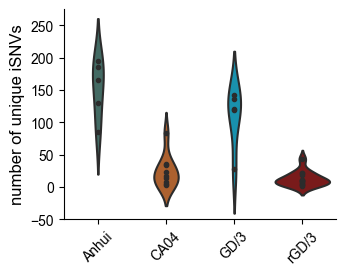

In [96]:
import seaborn as sns

GD3 = '#00A1C6'
rGD3 = '#890B0B'
Anhui = '#3C7067'
CA04 = '#C15D1A'

# convert the above into a dataframe for plotting

data_Anhui = [['Anhui_ferret25', Anhui_ferret25], ['Anhui_ferret27', Anhui_ferret27], ['Anhui_ferret28', Anhui_ferret28], ['Anhui_ferret29', Anhui_ferret29], ['Anhui_ferret31', Anhui_ferret31]]
data_CA04 = [['CA04_ferret1', CA04_ferret1],['CA04_ferret2', CA04_ferret2],['CA04_ferret3', CA04_ferret3],['CA04_ferret4', CA04_ferret4],['CA04_ferret5', CA04_ferret5],['CA04_ferret6', CA04_ferret6],['CA04_ferret33', CA04_ferret33], ['CA04_ferret35', CA04_ferret35], ['CA04_ferret36', CA04_ferret36]]
data_GD3 = [['GD3_ferret1', GD3_ferret1], ['GD3_ferret3', GD3_ferret3], ['GD3_ferret4', GD3_ferret4], ['GD3_ferret5', GD3_ferret5], ['GD3_ferret7', GD3_ferret7]]
data_rGD3 = [['rGD3_ferret9', rGD3_ferret9], ['rGD3_ferret10', rGD3_ferret10], ['rGD3_ferret11', rGD3_ferret11], ['rGD3_ferret12', rGD3_ferret12], ['rGD3_ferret13', rGD3_ferret13], ['rGD3_ferret15', rGD3_ferret15], ['rGD3_ferret16', rGD3_ferret16], ['rGD3_ferret17', rGD3_ferret17], ['rGD3_ferret18', rGD3_ferret18], ['rGD3_ferret19', rGD3_ferret19], ['rGD3_ferret21', rGD3_ferret21], ['rGD3_ferret22', rGD3_ferret22], ['rGD3_ferret23', rGD3_ferret23]]

# Create the pandas DataFrame
df_Anhui = pd.DataFrame(data_Anhui, columns = ['ferret', '# of unique iSNVs - Anhui'])
df_Anhui = df_Anhui[['# of unique iSNVs - Anhui']]

df_CA04 = pd.DataFrame(data_CA04, columns = ['ferret', '# of unique iSNVs - CA04'])
df_CA04 = df_CA04[['# of unique iSNVs - CA04']]

df_GD3 = pd.DataFrame(data_GD3, columns = ['ferret', '# of unique iSNVs - GD3'])
df_GD3 = df_GD3[['# of unique iSNVs - GD3']]

df_rGD3 = pd.DataFrame(data_rGD3, columns = ['ferret', '# of unique iSNVs - rGD3'])
df_rGD3 = df_rGD3[['# of unique iSNVs - rGD3']]

t = pd.concat([df_Anhui, df_CA04],axis=1)
t = pd.concat([t, df_GD3],axis=1)
t = pd.concat([t, df_rGD3],axis=1)

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(6,6), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2,5)

ax1 = fig.add_subplot(gs[0,0:3])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# set fontsize of axes 
ax1.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 10)

sns.violinplot(data=t, ax=ax1, palette=['#3C7067', '#C15D1A', '#00A1C6', '#890B0B'], inner='points', alpha=0.5)

ax1.set_facecolor('white')
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
ax1.set_ylim(-50,275)
ax1.set_ylabel('number of unique iSNVs', fontname='Arial', fontsize=12)
ax1.set_xticklabels(['Anhui','CA04','GD/3','rGD/3'], fontname='Arial', fontsize=10, minor=False, rotation=45)

plt.savefig('../figures/iSNV_counts/iSNV_counts_per_ferret.pdf', dpi=300)


## plot the number of iSNVs over time

In [97]:
# load all text files in a directory into Pandas dataframes 
def count_iSNVs(ferret):
    file = pd.read_csv('../data_derived/vcfs-intersection/' + ferret + '_intersection.csv', header=0, sep='\t', low_memory=False)
    file = file[file['%'] <= 0.99]
    iSNV_count = len(file)
    return(iSNV_count)

Anhui_ferret25_day1 = count_iSNVs('Anhui_ferret25_day1')
Anhui_ferret25_day3 = count_iSNVs('Anhui_ferret25_day3')
Anhui_ferret25_day5 = count_iSNVs('Anhui_ferret25_day5')
Anhui_ferret27_day1 = count_iSNVs('Anhui_ferret27_day1')
Anhui_ferret27_day1 = count_iSNVs('Anhui_ferret27_day1')
Anhui_ferret27_day3 = count_iSNVs('Anhui_ferret27_day3')
Anhui_ferret27_day5 = count_iSNVs('Anhui_ferret27_day5')
Anhui_ferret27_day7 = count_iSNVs('Anhui_ferret27_day7')
Anhui_ferret28_day3 = count_iSNVs('Anhui_ferret28_day3')
Anhui_ferret28_day5 = count_iSNVs('Anhui_ferret28_day5')
Anhui_ferret29_day1 = count_iSNVs('Anhui_ferret29_day1')
Anhui_ferret29_day3 = count_iSNVs('Anhui_ferret29_day3')
Anhui_ferret29_day5 = count_iSNVs('Anhui_ferret29_day5')
Anhui_ferret29_day7 = count_iSNVs('Anhui_ferret29_day7')
Anhui_ferret31_day1 = count_iSNVs('Anhui_ferret31_day1')
Anhui_ferret31_day3 = count_iSNVs('Anhui_ferret31_day3')
Anhui_ferret31_day5 = count_iSNVs('Anhui_ferret31_day5')

CA04_ferret1_day1 = count_iSNVs('CA04_ferret1_day1')
CA04_ferret1_day3 = count_iSNVs('CA04_ferret1_day3')
CA04_ferret1_day5 = count_iSNVs('CA04_ferret1_day5')
CA04_ferret2_day1 = count_iSNVs('CA04_ferret2_day1')
CA04_ferret2_day3 = count_iSNVs('CA04_ferret2_day3')
CA04_ferret2_day5 = count_iSNVs('CA04_ferret2_day5')
CA04_ferret3_day1 = count_iSNVs('CA04_ferret3_day1')
CA04_ferret3_day3 = count_iSNVs('CA04_ferret3_day3')
CA04_ferret3_day5 = count_iSNVs('CA04_ferret3_day5')
CA04_ferret4_day3 = count_iSNVs('CA04_ferret4_day3')
CA04_ferret4_day5 = count_iSNVs('CA04_ferret4_day5')
CA04_ferret5_day1 = count_iSNVs('CA04_ferret5_day1')
CA04_ferret5_day3 = count_iSNVs('CA04_ferret5_day3')
CA04_ferret5_day5 = count_iSNVs('CA04_ferret5_day5')
CA04_ferret6_day3 = count_iSNVs('CA04_ferret6_day3')
CA04_ferret6_day5 = count_iSNVs('CA04_ferret6_day5')
CA04_ferret33_day1 = count_iSNVs('CA04_ferret33_day1')
CA04_ferret33_day3 = count_iSNVs('CA04_ferret33_day3')
CA04_ferret33_day5 = count_iSNVs('CA04_ferret33_day5')
CA04_ferret33_day7 = count_iSNVs('CA04_ferret33_day7')
CA04_ferret35_day1 = count_iSNVs('CA04_ferret35_day1')
CA04_ferret35_day3 = count_iSNVs('CA04_ferret35_day3')
CA04_ferret35_day5 = count_iSNVs('CA04_ferret35_day5')
CA04_ferret36_day3 = count_iSNVs('CA04_ferret36_day3')
CA04_ferret36_day5 = count_iSNVs('CA04_ferret36_day5')

GD3_ferret1_day1 = count_iSNVs('GD3_ferret1_day1')
GD3_ferret1_day3 = count_iSNVs('GD3_ferret1_day3')
GD3_ferret1_day5 = count_iSNVs('GD3_ferret1_day5')
GD3_ferret3_day1 = count_iSNVs('GD3_ferret3_day1')
GD3_ferret3_day3 = count_iSNVs('GD3_ferret3_day3')
GD3_ferret3_day5 = count_iSNVs('GD3_ferret3_day5')
GD3_ferret3_day7 = count_iSNVs('GD3_ferret3_day7')
GD3_ferret4_day5 = count_iSNVs('GD3_ferret4_day5')
GD3_ferret4_day7 = count_iSNVs('GD3_ferret4_day7')
GD3_ferret4_day9 = count_iSNVs('GD3_ferret4_day9')
GD3_ferret4_day11 = count_iSNVs('GD3_ferret4_day11')
GD3_ferret5_day1 = count_iSNVs('GD3_ferret5_day1')
GD3_ferret5_day3 = count_iSNVs('GD3_ferret5_day3')
GD3_ferret5_day5 = count_iSNVs('GD3_ferret5_day5')
GD3_ferret5_day7 = count_iSNVs('GD3_ferret5_day7')
GD3_ferret7_day1 = count_iSNVs('GD3_ferret7_day1')
GD3_ferret7_day3 = count_iSNVs('GD3_ferret7_day3')
GD3_ferret7_day5 = count_iSNVs('GD3_ferret7_day5')
GD3_ferret7_day7 = count_iSNVs('GD3_ferret7_day7')
rGD3_ferret9_day1 = count_iSNVs('rGD3_ferret9_day1')
rGD3_ferret9_day3 = count_iSNVs('rGD3_ferret9_day3')
rGD3_ferret9_day5 = count_iSNVs('rGD3_ferret9_day5')
rGD3_ferret9_day7 = count_iSNVs('rGD3_ferret9_day7')
rGD3_ferret10_day3 = count_iSNVs('rGD3_ferret10_day3')
rGD3_ferret10_day5 = count_iSNVs('rGD3_ferret10_day5')
rGD3_ferret10_day7 = count_iSNVs('rGD3_ferret10_day7')
rGD3_ferret10_day9 = count_iSNVs('rGD3_ferret10_day9')
rGD3_ferret11_day1 = count_iSNVs('rGD3_ferret11_day1')
rGD3_ferret11_day3 = count_iSNVs('rGD3_ferret11_day3')
rGD3_ferret12_day3 = count_iSNVs('rGD3_ferret12_day3')
rGD3_ferret12_day5 = count_iSNVs('rGD3_ferret12_day5')
rGD3_ferret13_day1 = count_iSNVs('rGD3_ferret13_day1')
rGD3_ferret13_day3 = count_iSNVs('rGD3_ferret13_day3')
rGD3_ferret13_day5 = count_iSNVs('rGD3_ferret13_day5')
rGD3_ferret15_day1 = count_iSNVs('rGD3_ferret15_day1')
rGD3_ferret15_day3 = count_iSNVs('rGD3_ferret15_day3')
rGD3_ferret15_day5 = count_iSNVs('rGD3_ferret15_day5')
rGD3_ferret15_day7 = count_iSNVs('rGD3_ferret15_day7')
rGD3_ferret16_day3 = count_iSNVs('rGD3_ferret16_day3')
rGD3_ferret16_day5 = count_iSNVs('rGD3_ferret16_day5')
rGD3_ferret16_day7 = count_iSNVs('rGD3_ferret16_day7')
rGD3_ferret17_day1 = count_iSNVs('rGD3_ferret17_day1')
rGD3_ferret17_day3 = count_iSNVs('rGD3_ferret17_day3')
rGD3_ferret17_day5 = count_iSNVs('rGD3_ferret17_day5')
rGD3_ferret17_day7 = count_iSNVs('rGD3_ferret17_day7')
rGD3_ferret18_day11 = count_iSNVs('rGD3_ferret18_day11')
rGD3_ferret18_day13 = count_iSNVs('rGD3_ferret18_day13')
rGD3_ferret18_day15 = count_iSNVs('rGD3_ferret18_day15')
rGD3_ferret19_day1 = count_iSNVs('rGD3_ferret19_day1')
rGD3_ferret19_day3 = count_iSNVs('rGD3_ferret19_day3')
rGD3_ferret19_day5 = count_iSNVs('rGD3_ferret19_day5')
rGD3_ferret21_day1 = count_iSNVs('rGD3_ferret21_day1')
rGD3_ferret21_day3 = count_iSNVs('rGD3_ferret21_day3')
rGD3_ferret21_day5 = count_iSNVs('rGD3_ferret21_day5')
rGD3_ferret22_day3 = count_iSNVs('rGD3_ferret22_day3')
rGD3_ferret22_day5 = count_iSNVs('rGD3_ferret22_day5')
rGD3_ferret22_day7 = count_iSNVs('rGD3_ferret22_day7')
rGD3_ferret22_day9 = count_iSNVs('rGD3_ferret22_day9')
rGD3_ferret23_day1 = count_iSNVs('rGD3_ferret23_day1')
rGD3_ferret23_day3 = count_iSNVs('rGD3_ferret23_day3')
rGD3_ferret23_day5 = count_iSNVs('rGD3_ferret23_day5')
rGD3_ferret23_day7 = count_iSNVs('rGD3_ferret23_day7')

#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


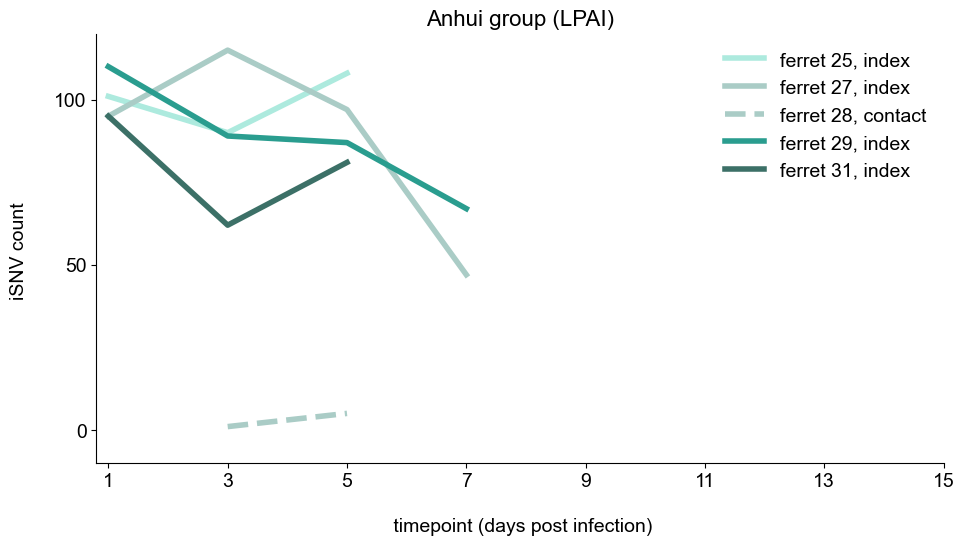

In [98]:
# plot iSNV counts for Anhui

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(14,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 12)

ax1 = fig.add_subplot(gs[0,0:8]) # beta-binomial estimates 

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# set fontsize of axes 
ax1.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 14)

x_A25 = [1,3,5]
y_A25 = [Anhui_ferret25_day1,Anhui_ferret25_day3,Anhui_ferret25_day5]

x_A27 = [1,3,5,7]
y_A27 = [Anhui_ferret27_day1,Anhui_ferret27_day3,Anhui_ferret27_day5,Anhui_ferret27_day7]

x_A28 = [3,5]
y_A28 = [Anhui_ferret28_day3,Anhui_ferret28_day5]

x_A29 = [1,3,5,7]
y_A29 = [Anhui_ferret29_day1,Anhui_ferret29_day3,Anhui_ferret29_day5,Anhui_ferret29_day7]

x_A31 = [1,3,5]
y_A31 = [Anhui_ferret31_day1,Anhui_ferret31_day3,Anhui_ferret31_day5]


ax1.plot(x_A25, y_A25, linestyle='-', c='#ADEADE', linewidth=4, label='ferret 25, index')
ax1.plot(x_A27, y_A27, linestyle='-', c='#AACCC6', linewidth=4, label='ferret 27, index')
ax1.plot(x_A28, y_A28, linestyle='--', c='#AACCC6', linewidth=4, label='ferret 28, contact')
ax1.plot(x_A29, y_A29, linestyle='-', c='#2A9D8F', linewidth=4, label='ferret 29, index')
ax1.plot(x_A31, y_A31, linestyle='-', c='#3C7067', linewidth=4, label='ferret 31, index')

# edit the axes - ax1
ax1.set_title('Anhui group (LPAI)', fontname='Arial', fontsize=16)
ax1.set_ylabel('iSNV count \n', fontname='Arial', fontsize=14)
ax1.set_xlabel('\n timepoint (days post infection)', fontname='Arial', fontsize=14)
ax1.set_facecolor('white')
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
ax1.set_ylim(-10,120)
ax1.set_yticks([0,50,100])
ax1.set_xlim(0.8,15)
ax1.set_xticks([1,3,5,7,9,11,13,15])

ax1.legend(frameon=False, fontsize=14)

# use tight_layout to optimize spacing of axes and titles within each subplot
fig.tight_layout()
fig.show()

# save this plot to the figures folder 
fig.savefig("../figures/iSNV_counts/Anhui.pdf", bbox_inches='tight', dpi=300)

plt.show()

/Users/katbraun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


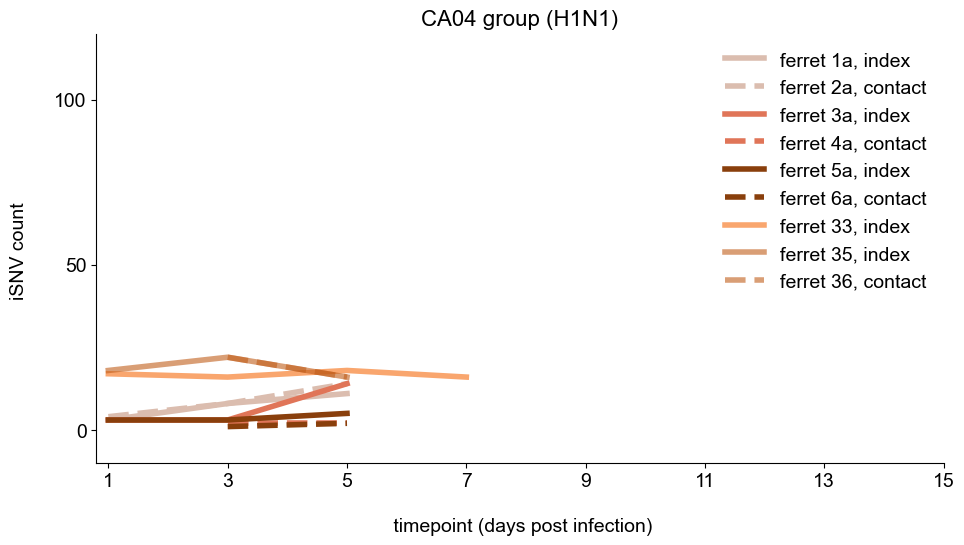

In [99]:
# plot iSNV counts for CA04

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(14,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 12)

ax1 = fig.add_subplot(gs[0,0:8]) # beta-binomial estimates 

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# set fontsize of axes 
ax1.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 14)

x_A1 = [1,3,5]
y_A1 = [CA04_ferret1_day1,CA04_ferret1_day3,CA04_ferret1_day5]

x_A2 = [1,3,5]
y_A2 = [CA04_ferret2_day1,CA04_ferret2_day3,CA04_ferret2_day5]

x_A3 = [1,3,5]
y_A3 = [CA04_ferret3_day1,CA04_ferret3_day3,CA04_ferret3_day5]

x_A4 = [3,5]
y_A4 = [CA04_ferret4_day3,CA04_ferret4_day5]

x_A5 = [1,3,5]
y_A5 = [CA04_ferret5_day1,CA04_ferret5_day3,CA04_ferret5_day5]

x_A6 = [3,5]
y_A6 = [CA04_ferret6_day3,CA04_ferret6_day5]

x_A33 = [1,3,5,7]
y_A33 = [CA04_ferret33_day1,CA04_ferret33_day3,CA04_ferret33_day5,CA04_ferret33_day7]

x_A35 = [1,3,5]
y_A35 = [CA04_ferret35_day1,CA04_ferret35_day3,CA04_ferret35_day5]

x_A36 = [3,5]
y_A36 = [CA04_ferret36_day3,CA04_ferret36_day5]


ax1.plot(x_A1, y_A1, linestyle='-', c='#DBBDAF', linewidth=4, label='ferret 1a, index')
ax1.plot(x_A2, y_A2, linestyle='--', c='#DBBDAF', linewidth=4, label='ferret 2a, contact')

ax1.plot(x_A3, y_A3, linestyle='-', c='#E07558', linewidth=4, label='ferret 3a, index')
ax1.plot(x_A4, y_A4, linestyle='--', c='#E07558', linewidth=4, label='ferret 4a, contact')

ax1.plot(x_A5, y_A5, linestyle='-', c='#893F0C', linewidth=4, label='ferret 5a, index')
ax1.plot(x_A6, y_A6, linestyle='--', c='#893F0C', linewidth=4, label='ferret 6a, contact')

ax1.plot(x_A33, y_A33, linestyle='-', c='#F9A66E', linewidth=4, label='ferret 33, index')
ax1.plot(x_A35, y_A35, linestyle='-', c='#C15D1A', linewidth=4, label='ferret 35, index', alpha=0.6)
ax1.plot(x_A36, y_A36, linestyle='--', c='#C15D1A', linewidth=4, label='ferret 36, contact', alpha=0.6)

# edit the axes - ax1
ax1.set_title('CA04 group (H1N1)', fontname='Arial', fontsize=16)
ax1.set_ylabel('iSNV count \n', fontname='Arial', fontsize=14)
ax1.set_xlabel('\n timepoint (days post infection)', fontname='Arial', fontsize=14)
ax1.set_facecolor('white')
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
ax1.set_ylim(-10,120)
ax1.set_yticks([0,50,100])
ax1.set_xlim(0.8,15)
ax1.set_xticks([1,3,5,7,9,11,13,15])

ax1.legend(frameon=False, fontsize=14)

# use tight_layout to optimize spacing of axes and titles within each subplot
fig.tight_layout()
fig.show()

# save this plot to the figures folder 
fig.savefig("../figures/iSNV_counts/CA04.pdf", bbox_inches='tight', dpi=300)

plt.show()

/Users/katbraun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


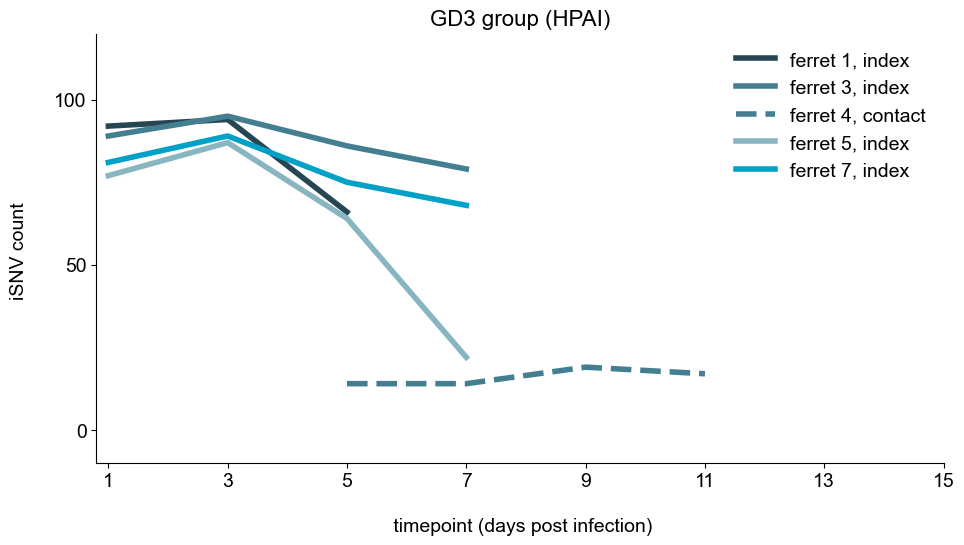

In [100]:
# plot iSNV counts for GD3

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(14,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 12)

ax1 = fig.add_subplot(gs[0,0:8]) # beta-binomial estimates 

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# set fontsize of axes 
ax1.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 14)

x_A1 = [1,3,5]
y_A1 = [GD3_ferret1_day1,GD3_ferret1_day3,GD3_ferret1_day5]

x_A3 = [1,3,5,7]
y_A3 = [GD3_ferret3_day1,GD3_ferret3_day3,GD3_ferret3_day5,GD3_ferret3_day7]

x_A4 = [5,7,9,11]
y_A4 = [GD3_ferret4_day5,GD3_ferret4_day7,GD3_ferret4_day9,GD3_ferret4_day11]

x_A5 = [1,3,5,7]
y_A5 = [GD3_ferret5_day1,GD3_ferret5_day3,GD3_ferret5_day5,GD3_ferret5_day7]

x_A7 = [1,3,5,7]
y_A7 = [GD3_ferret7_day1,GD3_ferret7_day3,GD3_ferret7_day5,GD3_ferret7_day7]

ax1.plot(x_A1, y_A1, linestyle='-', c='#264653', linewidth=4, label='ferret 1, index')
ax1.plot(x_A3, y_A3, linestyle='-', c='#447F91', linewidth=4, label='ferret 3, index')
ax1.plot(x_A4, y_A4, linestyle='--', c='#447F91', linewidth=4, label='ferret 4, contact')
ax1.plot(x_A5, y_A5, linestyle='-', c='#87B6C1', linewidth=4, label='ferret 5, index')
ax1.plot(x_A7, y_A7, linestyle='-', c='#00A1C6', linewidth=4, label='ferret 7, index')

# edit the axes - ax1
ax1.set_title('GD3 group (HPAI)', fontname='Arial', fontsize=16)
ax1.set_ylabel('iSNV count \n', fontname='Arial', fontsize=14)
ax1.set_xlabel('\n timepoint (days post infection)', fontname='Arial', fontsize=14)
ax1.set_facecolor('white')
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
ax1.set_ylim(-10,120)
ax1.set_yticks([0,50,100])
ax1.set_xlim(0.8,15)
ax1.set_xticks([1,3,5,7,9,11,13,15])

ax1.legend(frameon=False, fontsize=14)

# use tight_layout to optimize spacing of axes and titles within each subplot
fig.tight_layout()
fig.show()

# save this plot to the figures folder 
fig.savefig("../figures/iSNV_counts/GD3.pdf", bbox_inches='tight', dpi=300)

plt.show()

/Users/katbraun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:92: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


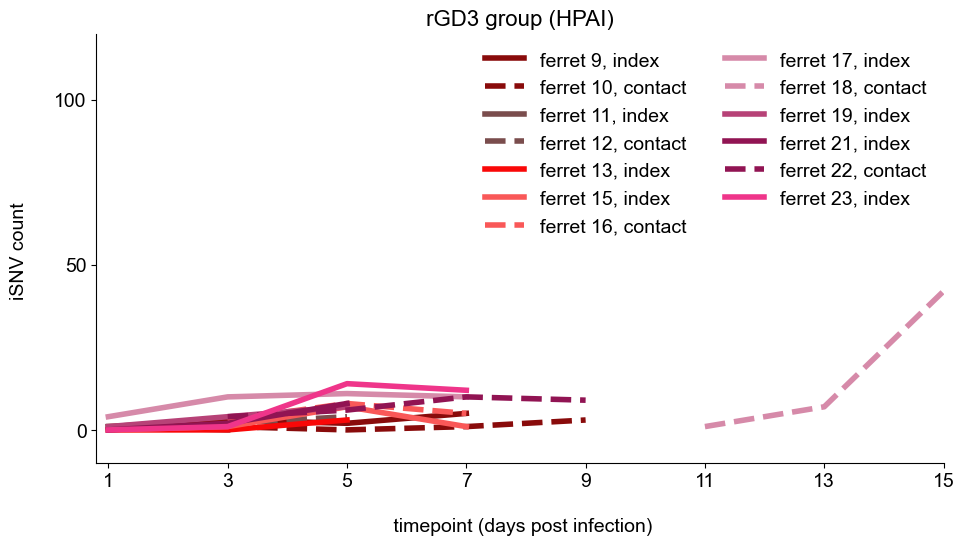

In [101]:
# plot iSNV counts for rGD3

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(14,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 12)

ax1 = fig.add_subplot(gs[0,0:8]) # beta-binomial estimates 

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# set fontsize of axes 
ax1.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 14)

x_A9 = [1,3,5,7]
y_A9 = [rGD3_ferret9_day1,rGD3_ferret9_day3,rGD3_ferret9_day5,rGD3_ferret9_day7]

x_A10 = [3,5,7,9]
y_A10 = [rGD3_ferret10_day3,rGD3_ferret10_day5,rGD3_ferret10_day7,rGD3_ferret10_day9]

x_A11 = [1,3]
y_A11 = [rGD3_ferret11_day1,rGD3_ferret11_day3]

x_A12 = [3,5]
y_A12 = [rGD3_ferret12_day3,rGD3_ferret12_day5]

x_A13 = [1,3,5]
y_A13 = [rGD3_ferret13_day1,rGD3_ferret13_day3,rGD3_ferret13_day5]

x_A15 = [1,3,5,7]
y_A15 = [rGD3_ferret15_day1,rGD3_ferret15_day3,rGD3_ferret15_day5,rGD3_ferret15_day7]

x_A16 = [3,5,7]
y_A16 = [rGD3_ferret16_day3,rGD3_ferret16_day5,rGD3_ferret16_day7]

x_A17 = [1,3,5,7]
y_A17 = [rGD3_ferret17_day1,rGD3_ferret17_day3,rGD3_ferret17_day5,rGD3_ferret17_day7]

x_A18 = [11,13,15]
y_A18 = [rGD3_ferret18_day11,rGD3_ferret18_day13,rGD3_ferret18_day15]

x_A19 = [1,3,5]
y_A19 = [rGD3_ferret19_day1,rGD3_ferret19_day3,rGD3_ferret19_day5]

x_A21 = [1,3,5]
y_A21 = [rGD3_ferret21_day1,rGD3_ferret21_day3,rGD3_ferret21_day5]

x_A22 = [3,5,7,9]
y_A22 = [rGD3_ferret22_day3,rGD3_ferret22_day5,rGD3_ferret22_day7,rGD3_ferret22_day9]

x_A23 = [1,3,5,7]
y_A23 = [rGD3_ferret23_day1,rGD3_ferret23_day3,rGD3_ferret23_day5,rGD3_ferret23_day7]

ax1.plot(x_A9, y_A9, linestyle='-', c='#890B0B', linewidth=4, label='ferret 9, index')
ax1.plot(x_A10, y_A10, linestyle='--', c='#890B0B', linewidth=4, label='ferret 10, contact')
ax1.plot(x_A11, y_A11, linestyle='-', c='#7A4D4D', linewidth=4, label='ferret 11, index')
ax1.plot(x_A12, y_A12, linestyle='--', c='#7A4D4D', linewidth=4, label='ferret 12, contact')
ax1.plot(x_A13, y_A13, linestyle='-', c='#F90808', linewidth=4, label='ferret 13, index')
ax1.plot(x_A15, y_A15, linestyle='-', c='#F95858', linewidth=4, label='ferret 15, index')
ax1.plot(x_A16, y_A16, linestyle='--', c='#F95858', linewidth=4, label='ferret 16, contact')
ax1.plot(x_A17, y_A17, linestyle='-', c='#D68AA9', linewidth=4, label='ferret 17, index')
ax1.plot(x_A18, y_A18, linestyle='--', c='#D68AA9', linewidth=4, label='ferret 18, contact')
ax1.plot(x_A19, y_A19, linestyle='-', c='#B74277', linewidth=4, label='ferret 19, index')
ax1.plot(x_A21, y_A21, linestyle='-', c='#911453', linewidth=4, label='ferret 21, index')
ax1.plot(x_A22, y_A22, linestyle='--', c='#911453', linewidth=4, label='ferret 22, contact')
ax1.plot(x_A23, y_A23, linestyle='-', c='#EF358A', linewidth=4, label='ferret 23, index')

# edit the axes - ax1
ax1.set_title('rGD3 group (HPAI)', fontname='Arial', fontsize=16)
ax1.set_ylabel('iSNV count \n', fontname='Arial', fontsize=14)
ax1.set_xlabel('\n timepoint (days post infection)', fontname='Arial', fontsize=14)
ax1.set_facecolor('white')
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
ax1.set_ylim(-10,120)
ax1.set_yticks([0,50,100])
ax1.set_xlim(0.8,15)
ax1.set_xticks([1,3,5,7,9,11,13,15])

ax1.legend(frameon=False, fontsize=14, ncol=2)

# use tight_layout to optimize spacing of axes and titles within each subplot
fig.tight_layout()
fig.show()

# save this plot to the figures folder 
fig.savefig("../figures/iSNV_counts/rGD3.pdf", bbox_inches='tight', dpi=300)

plt.show()

In [102]:
# are rates of h1n1 and h7n9 transmission actually different? 

import numpy as np


h1n1 = [0.5,1.0] #transmission events = 1/2 and 3/3
h7n9 = [0.25,0.25,0.5,0.75] #transmisssion events = 1/4, 1/4, 2/4, and 3/4

# unpaired t-test
stats.mannwhitneyu(h1n1,h7n9)

MannwhitneyuResult(statistic=1.5, pvalue=0.17017787119260075)

In [103]:
# is the proportion of total unique iSNVs per ferret different across virus groups

import scikit_posthocs as sp

anhui= [165,186,85,195,130]
ca04 = [34,35,23,13,17,83,4,7,3]
gd3 = [120,136,27,119,142]
rgd3 = [11,5,1,4,3,9,8,22,43,10,9,18,22]

#anova
print(stats.f_oneway(anhui,ca04,gd3,rgd3))

x = [[165,186,85,195,130],[34,35,23,13,17,83,4,7,3], [120,136,27,119,142], [11,5,1,4,3,9,8,22,43,10,9,18,22]]
sp.posthoc_conover(x, p_adjust = 'holm')

#

F_onewayResult(statistic=37.11911195406549, pvalue=6.826035824526289e-10)


array([[-1.00000000e+00,  3.96470240e-04,  4.12205998e-01,
         1.55011764e-05],
       [ 3.96470240e-04, -1.00000000e+00,  4.54676531e-03,
         4.12205998e-01],
       [ 4.12205998e-01,  4.54676531e-03, -1.00000000e+00,
         2.44598753e-04],
       [ 1.55011764e-05,  4.12205998e-01,  2.44598753e-04,
        -1.00000000e+00]])

In [104]:
# is the proportion of nonsyn/total unique iSNVs different across virus groups

anhui= [69/165,83/186,18/85,78/195,56/130]
ca04 = [21/34,22/35,17/23,10/13,14/17,50/83,3/4,2/71/3]
gd3 = [51/120,54/136,11/27,52/119,63/142]
rgd3 = [5/11,1/5,0/1,1/4,2/3,8/9,4/8,14/22,22/43,4/10,4/9,11/18,14/22]

#anova
stats.f_oneway(anhui,ca04,gd3,rgd3)

F_onewayResult(statistic=1.6829345512782612, pvalue=0.1941740611902512)

In [105]:
print(anhui)

[0.41818181818181815, 0.44623655913978494, 0.21176470588235294, 0.4, 0.4307692307692308]


In [106]:
print(ca04)

[0.6176470588235294, 0.6285714285714286, 0.7391304347826086, 0.7692307692307693, 0.8235294117647058, 0.6024096385542169, 0.75, 0.009389671361502348]


In [107]:
print(gd3)

[0.425, 0.39705882352941174, 0.4074074074074074, 0.4369747899159664, 0.44366197183098594]


In [108]:
print(rgd3)

[0.45454545454545453, 0.2, 0.0, 0.25, 0.6666666666666666, 0.8888888888888888, 0.5, 0.6363636363636364, 0.5116279069767442, 0.4, 0.4444444444444444, 0.6111111111111112, 0.6363636363636364]


In [109]:
# do the distribution of iSNVs across the genome differ by virus group? 

# Anhui (gene lengths): 2281 (17.4),2274 (17.4),2151 (16.4),1683(12.8),1497 (11.4),1398(10.7),982(7.5),838 (6.4) (13104)
# GD3 (gene lengths): 22280 (17.4),2274(17.3),2145(16.4),1696(12.9),1497(11.4),1398(10.7),982(7.5),838(6.4) (13110)
# CA40 (gene lengths): 2280 (17.3),2274(17.2),2151(16.3),1701(12.9),1497(11.4),1411(10.7),982 (7.5),863 (6.6) (13159)

In [110]:
# load all text files in a directory into Pandas dataframes 
def load_intersection_dataframes(path, ferret):
    filelist = [os.path.splitext(file)[0] for file in os.listdir(path) if file.startswith(ferret)]
    list_of_DFs = []
    for file in filelist:
        DF = path + '/' + file + '.csv'
        file = pd.read_csv(DF, header=0, sep='\t', low_memory=False)
        file = file[file['%'] <= 0.99]
        list_of_DFs.append(file)
    return(list_of_DFs)
    
def run_load_intersection_dataframes_anhui(ferret): 
    a = load_intersection_dataframes('../data_derived/vcfs-intersection', ferret)
    all_intersection_dataframes = pd.concat(a, axis=0) # concat all dataframes 
    all_intersection_dataframes = all_intersection_dataframes.drop_duplicates(['SNP'], keep='first')
    a = len(all_intersection_dataframes)
    PB2 = (all_intersection_dataframes.SNP.str.count('PB2').sum() / a ) / .174
#     print("iSNVs per nucleotide in PB2: ", PB2)
    PB1 = (all_intersection_dataframes.SNP.str.count('PB1').sum() / a ) / .174
#     print("iSNVs per nucleotide in PB1: ", PB1)
    PA = (all_intersection_dataframes.SNP.str.count('PA').sum() / a) / .164
#     print("iSNVs per nucleotide in PA: ", PA)
    HA = (all_intersection_dataframes.SNP.str.count('HA').sum() / a) / .128
#     print("iSNVs per nucleotide in HA: ", HA)
    NP = (all_intersection_dataframes.SNP.str.count('NP').sum() / a) / .114
#     print("iSNVs per nucleotide in NP: ", NP)
    NA = (all_intersection_dataframes.SNP.str.count('NA').sum() / a) / .107
#     print("iSNVs per nucleotide in NA: ", NA)
    MP = ((all_intersection_dataframes.SNP.str.count('M1').sum() + all_intersection_dataframes.SNP.str.count('M2').sum()) / a) / .075
#     print("iSNVs per nucleotide in MP: ", MP)
    NS = ((all_intersection_dataframes.SNP.str.count('NS1').sum() + all_intersection_dataframes.SNP.str.count('NEP').sum()) / a) / .064
#     print("iSNVs per nucleotide in NS: ", NS)
    l = (PB2 + PB1 + PA + HA + NP+ NA + MP + NS) / 8
    return(l)

In [111]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'Anhui_ferret25')
a25 = run_load_intersection_dataframes_anhui('Anhui_ferret25')

In [112]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'Anhui_ferret27')
a27 = run_load_intersection_dataframes_anhui('Anhui_ferret27')

In [113]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'Anhui_ferret28')
a28 = run_load_intersection_dataframes_anhui('Anhui_ferret28')

In [114]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'Anhui_ferret29')
a29 = run_load_intersection_dataframes_anhui('Anhui_ferret29')

In [115]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'Anhui_ferret31')
a31 = run_load_intersection_dataframes_anhui('Anhui_ferret31')

In [116]:
# load all text files in a directory into Pandas dataframes 
def load_intersection_dataframes(path, ferret):
    filelist = [os.path.splitext(file)[0] for file in os.listdir(path) if file.startswith(ferret)]
    list_of_DFs = []
    for file in filelist:
        DF = path + '/' + file + '.csv'
        file = pd.read_csv(DF, header=0, sep='\t', low_memory=False)
        file = file[file['%'] <= 0.99]
        list_of_DFs.append(file)
    return(list_of_DFs)
    
def run_load_intersection_dataframes_gd3(ferret): 
    a = load_intersection_dataframes('../data_derived/vcfs-intersection', ferret)
    all_intersection_dataframes = pd.concat(a, axis=0) # concat all dataframes 
    all_intersection_dataframes = all_intersection_dataframes.drop_duplicates(['SNP'], keep='first')
    a = len(all_intersection_dataframes)
    PB2 = (all_intersection_dataframes.SNP.str.count('PB2').sum() / a ) / .174
#     print("iSNVs per nucleotide in PB2: ", PB2)
    PB1 = (all_intersection_dataframes.SNP.str.count('PB1').sum() / a ) / .173
#     print("iSNVs per nucleotide in PB1: ", PB1)
    PA = (all_intersection_dataframes.SNP.str.count('PA').sum() / a) / .164
#     print("iSNVs per nucleotide in PA: ", PA)
    HA = (all_intersection_dataframes.SNP.str.count('HA').sum() / a) / .129
#     print("iSNVs per nucleotide in HA: ", HA)
    NP = (all_intersection_dataframes.SNP.str.count('NP').sum() / a) / .114
#     print("iSNVs per nucleotide in NP: ", NP)
    NA = (all_intersection_dataframes.SNP.str.count('NA').sum() / a) / .107
#     print("iSNVs per nucleotide in NA: ", NA)
    MP = ((all_intersection_dataframes.SNP.str.count('M1').sum() + all_intersection_dataframes.SNP.str.count('M2').sum()) / a) / .075
#     print("iSNVs per nucleotide in MP: ", MP)
    NS = ((all_intersection_dataframes.SNP.str.count('NS1').sum() + all_intersection_dataframes.SNP.str.count('NEP').sum()) / a) / .064
#     print("iSNVs per nucleotide in NS: ", NS)
    l = (PB2 + PB1 + PA + HA + NP+ NA + MP + NS) / 8
    return(l)

In [117]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'GD3_ferret1')
g1 = run_load_intersection_dataframes_gd3('GD3_ferret1')

In [118]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'GD3_ferret3')
g3 = run_load_intersection_dataframes_gd3('GD3_ferret3')

In [119]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'GD3_ferret4')
g4 = run_load_intersection_dataframes_gd3('GD3_ferret4')

In [120]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'GD3_ferret5')
g5 = run_load_intersection_dataframes_gd3('GD3_ferret5')

In [121]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'GD3_ferret7')
g7 = run_load_intersection_dataframes_gd3('GD3_ferret7')

In [122]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret9')
r9 = run_load_intersection_dataframes_gd3('rGD3_ferret9')

In [123]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret10')
r10 = run_load_intersection_dataframes_gd3('rGD3_ferret10')

In [124]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret11')
r11 = run_load_intersection_dataframes_gd3('rGD3_ferret11')

In [125]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret12')
r12 = run_load_intersection_dataframes_gd3('rGD3_ferret12')

In [126]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret13')
r13 = run_load_intersection_dataframes_gd3('rGD3_ferret13')

In [127]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret15')
r15 = run_load_intersection_dataframes_gd3('rGD3_ferret15')

In [128]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret16')
r16 = run_load_intersection_dataframes_gd3('rGD3_ferret16')

In [129]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret17')
r17 = run_load_intersection_dataframes_gd3('rGD3_ferret17')

In [130]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret18')
r18 = run_load_intersection_dataframes_gd3('rGD3_ferret18')

In [131]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret19')
r19 = run_load_intersection_dataframes_gd3('rGD3_ferret19')

In [132]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret21')
r21 = run_load_intersection_dataframes_gd3('rGD3_ferret21')

In [133]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret22')
r22 = run_load_intersection_dataframes_gd3('rGD3_ferret22')

In [134]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'rGD3_ferret23')
r23 = run_load_intersection_dataframes_gd3('rGD3_ferret23')

In [135]:
# load all text files in a directory into Pandas dataframes 
def load_intersection_dataframes(path, ferret):
    filelist = [os.path.splitext(file)[0] for file in os.listdir(path) if file.startswith(ferret)]
    list_of_DFs = []
    for file in filelist:
        DF = path + '/' + file + '.csv'
        file = pd.read_csv(DF, header=0, sep='\t', low_memory=False)
        file = file[file['%'] <= 0.99]
        list_of_DFs.append(file)
    return(list_of_DFs)
    
def run_load_intersection_dataframes_ca04(ferret): 
    a = load_intersection_dataframes('../data_derived/vcfs-intersection', ferret)
    all_intersection_dataframes = pd.concat(a, axis=0) # concat all dataframes 
    all_intersection_dataframes = all_intersection_dataframes.drop_duplicates(['SNP'], keep='first')
    a = len(all_intersection_dataframes)
    PB2 = (all_intersection_dataframes.SNP.str.count('PB2').sum() / a ) / .173
#     print("iSNVs per nucleotide in PB2: ", PB2)
    PB1 = (all_intersection_dataframes.SNP.str.count('PB1').sum() / a ) / .172
#     print("iSNVs per nucleotide in PB1: ", PB1)
    PA = (all_intersection_dataframes.SNP.str.count('PA').sum() / a) / .163
#     print("iSNVs per nucleotide in PA: ", PA)
    HA = (all_intersection_dataframes.SNP.str.count('HA').sum() / a) / .129
#     print("iSNVs per nucleotide in HA: ", HA)
    NP = (all_intersection_dataframes.SNP.str.count('NP').sum() / a) / .114
#     print("iSNVs per nucleotide in NP: ", NP)
    NA = (all_intersection_dataframes.SNP.str.count('NA').sum() / a) / .107
#     print("iSNVs per nucleotide in NA: ", NA)
    MP = ((all_intersection_dataframes.SNP.str.count('M1').sum() + all_intersection_dataframes.SNP.str.count('M2').sum()) / a) / .075
#     print("iSNVs per nucleotide in MP: ", MP)
    NS = ((all_intersection_dataframes.SNP.str.count('NS1').sum() + all_intersection_dataframes.SNP.str.count('NEP').sum()) / a) / .066
#     print("iSNVs per nucleotide in NS: ", NS)
    l = (PB2 + PB1 + PA + HA + NP+ NA + MP + NS) / 8
    return(l)

In [136]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'CA04_ferret1')
c1 = run_load_intersection_dataframes_gd3('CA04_ferret1')

In [137]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'CA04_ferret2')
c2 = run_load_intersection_dataframes_gd3('CA04_ferret2')

In [138]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'CA04_ferret3')
c3 = run_load_intersection_dataframes_gd3('CA04_ferret3')

In [139]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'CA04_ferret4')
c4 = run_load_intersection_dataframes_gd3('CA04_ferret4')

In [140]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'CA04_ferret5')
c5 = run_load_intersection_dataframes_gd3('CA04_ferret5')

In [141]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'CA04_ferret6')
c6 = run_load_intersection_dataframes_gd3('CA04_ferret6')

In [142]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'CA04_ferret33')
c33 = run_load_intersection_dataframes_gd3('CA04_ferret33')

In [143]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'CA04_ferret35')
c35 = run_load_intersection_dataframes_gd3('CA04_ferret35')

In [144]:
load_intersection_dataframes('../data_derived/vcfs-intersection', 'CA04_ferret36')
c36 = run_load_intersection_dataframes_gd3('CA04_ferret36')

In [145]:
# what about the distribution iSNVs across the genome

anhui= [a25,a27,a28,a29,a31]
ca04 = [c1,c2,c3,c4,c5,c6,c33,c35,c36]
gd3 = [g1,g3,g4,g5,g7]
rgd3 = [r9,r10,r11,r12,r13,r15,r16,r17,r18,r19,r21,r22,r23]

#anova
stats.f_oneway(anhui,ca04,gd3,rgd3)

F_onewayResult(statistic=0.5371686247891875, pvalue=0.6606880505515327)